In [202]:
!pip install yfinance
!pip install mpl_finance
!pip install ta

In [203]:
import pandas as pd
import numpy as np
import yfinance as yf
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
import ta
import warnings
warnings.filterwarnings("ignore")
from matplotlib import cycler

colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")
plt.rc('figure', facecolor='#313233')


In [204]:
df = yf.download("EURUSD=X", start = "2010-01-01")

[*********************100%***********************]  1 of 1 completed


In [205]:
# Creem una columna per fer les velas del candlestick graph
df["Date"] = pd.to_datetime(df.index)
df["Date"] = df["Date"].apply(mpl_dates.date2num)

In [206]:
df.columns = ["open","high","low","close","adj close","volume","date"]
df.index.name = "time"
df

,open,high,low,close,adj close,volume,date
time,,,,,,,
2010-01-01,1.432706,1.440196,1.432706,1.438994,1.438994,0,14610.0
2010-01-04,1.431004,1.445191,1.426208,1.442398,1.442398,0,14613.0
2010-01-05,1.442710,1.448310,1.435194,1.436596,1.436596,0,14614.0
2010-01-06,1.436596,1.443460,1.429123,1.440403,1.440403,0,14615.0
2010-01-07,1.440300,1.444481,1.430206,1.431803,1.431803,0,14616.0
...,...,...,...,...,...,...,...
2024-08-28,1.117793,1.118193,1.110543,1.117793,1.117793,0,19963.0
2024-08-29,1.112496,1.114020,1.105632,1.112496,1.112496,0,19964.0
2024-08-30,1.108045,1.109570,1.105400,1.108045,1.108045,0,19965.0


# Creació del suport i resistència

In [208]:
# creem columnes buides
df["support"] = np.nan
df["resistance"] = np.nan

In [209]:
# Después de 5 descensos consecutivos del mínimo, anotamos este precio como el soporte
df.loc[(df["low"].shift(5) > df["low"].shift(4))&
       (df["low"].shift(4) > df["low"].shift(3))&
       (df["low"].shift(3) > df["low"].shift(2))&
       (df["low"].shift(2) > df["low"].shift(1))&
       (df["low"].shift(1) > df["low"].shift(0)), "support"] = df["low"]


# Después de 5 subidas consecutivas del máximo, observamos este precio como la resistencia
df.loc[(df["high"].shift(5) < df["high"].shift(4)) &
(df["high"].shift(4) < df["high"].shift(3)) &
(df["high"].shift(3) < df["high"].shift(2)) &
(df["high"].shift(2) < df["high"].shift(1)) &
(df["high"].shift(1) < df["high"].shift(0)), "resistance"] = df["high"]

In [210]:
df

,open,high,low,close,adj close,volume,date,support,resistance
time,,,,,,,,,
2010-01-01,1.432706,1.440196,1.432706,1.438994,1.438994,0,14610.0,NaN,NaN
2010-01-04,1.431004,1.445191,1.426208,1.442398,1.442398,0,14613.0,NaN,NaN
2010-01-05,1.442710,1.448310,1.435194,1.436596,1.436596,0,14614.0,NaN,NaN
2010-01-06,1.436596,1.443460,1.429123,1.440403,1.440403,0,14615.0,NaN,NaN
2010-01-07,1.440300,1.444481,1.430206,1.431803,1.431803,0,14616.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-08-28,1.117793,1.118193,1.110543,1.117793,1.117793,0,19963.0,NaN,NaN
2024-08-29,1.112496,1.114020,1.105632,1.112496,1.112496,0,19964.0,NaN,NaN
2024-08-30,1.108045,1.109570,1.105400,1.108045,1.108045,0,19965.0,NaN,NaN


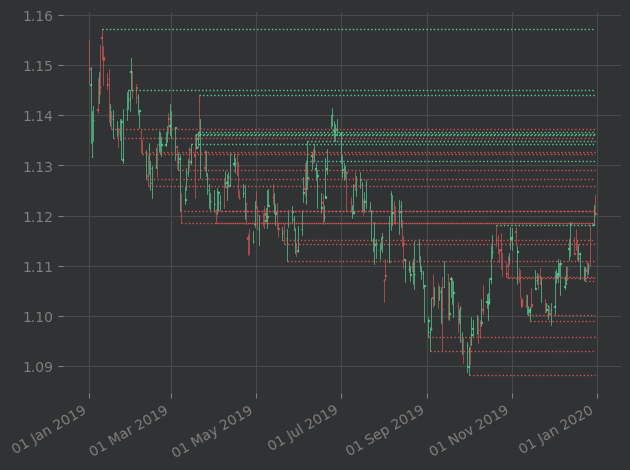

In [211]:
df_bis = df.loc["2019"]

# Inicializar el gráfico
fig, ax = plt.subplots()

# Dibujar el candlestick
candlestick_ohlc(ax,df_bis[["date", "open", "high", "low", "close"]].values,width=0.6, \
                  colorup='#57CE95', colordown='#CE5757', alpha=0.8)

# Poner la fecha como eje x
date_format = mpl_dates.DateFormatter('%d %b %Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
fig.tight_layout()

# Representar líneas de resistencia
for resistance, date in zip(df_bis["resistance"].dropna(), df_bis["resistance"].dropna().index):
  plt.hlines(resistance, xmin=date, xmax=df_bis.index[-1], colors='#57CE95', linestyles=":", linewidth=1)

# Representar líneas de soporte
for support, date in zip(df_bis["support"].dropna(), df_bis["support"].dropna().index):
  plt.hlines(support, xmin=date, xmax=df_bis.index[-1], colors='#CE5757', linestyles=":", linewidth=1)

# Representar la figura
fig.show()

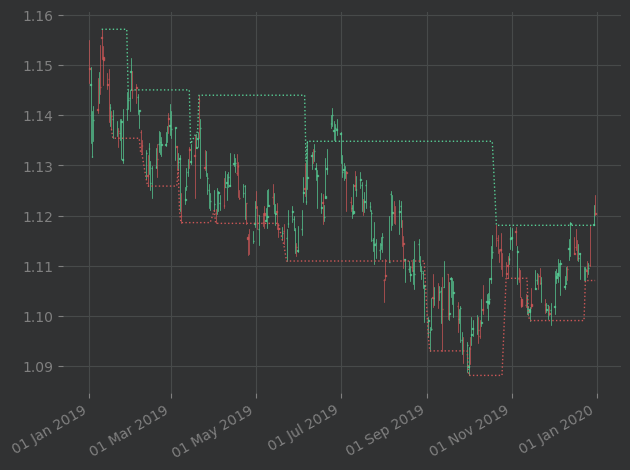

In [212]:

df = df.loc["2019"]

# Inicializar el gráfico
fig, ax = plt.subplots()

# Representar el candlestick
candlestick_ohlc(ax,df[["date", "open", "high", "low", "close"]].values,width=0.6, \
                  colorup='#57CE95', colordown='#CE5757', alpha=0.8)

# Poner la fecha como eje x
date_format = mpl_dates.DateFormatter('%d %b %Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
fig.tight_layout()

# Representar líneas de resistencia
plt.plot(df["support"].fillna(method="ffill"),color='#CE5757', linestyle=":", linewidth=1)


# Representar líneas de soporte
plt.plot(df["resistance"].fillna(method="ffill"),color='#57CE95', linestyle=":", linewidth=1)

# Mostrar la figura
fig.show()

# Estrategia suport i resistencia

In [243]:


# Crear la señal
df["signal"] = 0

# Suavizar el soporte y la resistencia para crear la estrategia
df["smooth resistance"] = df["resistance"].fillna(method="ffill")
df["smooth support"] = df["support"].fillna(method="ffill")

# Crear condiciones de compra
condition_1_buy = (df["close"].shift(1) < df["smooth resistance"].shift(1)) &\
                   (df["smooth resistance"]*(1+0/100) <df["smooth support"].shift(1)) &\
                   (df["smooth support"]*(1-0/100)>df["close"])


# Colocar la señal
df.loc[condition_1_buy, "signal"] = 1
df.loc[condition_1_sell, "signal"] = -1


<bound method DataFrame.info of                 open      high       low     close  adj close  volume  \
time                                                                    
2019-01-01  1.149425  1.155001  1.146500  1.149306   1.149306       0   
2019-01-02  1.146132  1.149700  1.134572  1.146171   1.146171       0   
2019-01-03  1.131734  1.140914  1.131734  1.131811   1.131811       0   
2019-01-04  1.139095  1.141774  1.134816  1.139108   1.139108       0   
2019-01-07  1.141292  1.147447  1.140524  1.141044   1.141044       0   
...              ...       ...       ...       ...        ...     ...   
2019-12-25  1.109139  1.110864  1.107788  1.109016   1.109016       0   
2019-12-26  1.109509  1.110494  1.108279  1.109545   1.109545       0   
2019-12-27  1.110124  1.118068  1.110000  1.110112   1.110112       0   
2019-12-30  1.118155  1.122070  1.118155  1.118230   1.118230       0   
2019-12-31  1.120448  1.124101  1.120072  1.120230   1.120230       0   

               dat

,open,high,low,close,adj close,volume,date,support,resistance,signal,smooth resistance,smooth support,pct,return
time,,,,,,,,,,,,,,
2019-01-01,1.149425,1.155001,1.146500,1.149306,1.149306,0,17897.0,NaN,NaN,0,NaN,NaN,NaN,NaN
2019-01-02,1.146132,1.149700,1.134572,1.146171,1.146171,0,17898.0,NaN,NaN,0,NaN,NaN,-0.002728,NaN
2019-01-03,1.131734,1.140914,1.131734,1.131811,1.131811,0,17899.0,NaN,NaN,0,NaN,NaN,-0.012529,NaN
2019-01-04,1.139095,1.141774,1.134816,1.139108,1.139108,0,17900.0,NaN,NaN,0,NaN,NaN,0.006447,NaN
2019-01-07,1.141292,1.147447,1.140524,1.141044,1.141044,0,17903.0,NaN,NaN,0,NaN,NaN,0.001700,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-25,1.109139,1.110864,1.107788,1.109016,1.109016,0,18255.0,NaN,NaN,0,1.118068,1.107064,-0.000333,-0.0
2019-12-26,1.109509,1.110494,1.108279,1.109545,1.109545,0,18256.0,NaN,NaN,0,1.118068,1.107064,0.000477,-0.0
2019-12-27,1.110124,1.118068,1.110000,1.110112,1.110112,0,18257.0,NaN,NaN,0,1.118068,1.107064,0.000511,-0.0


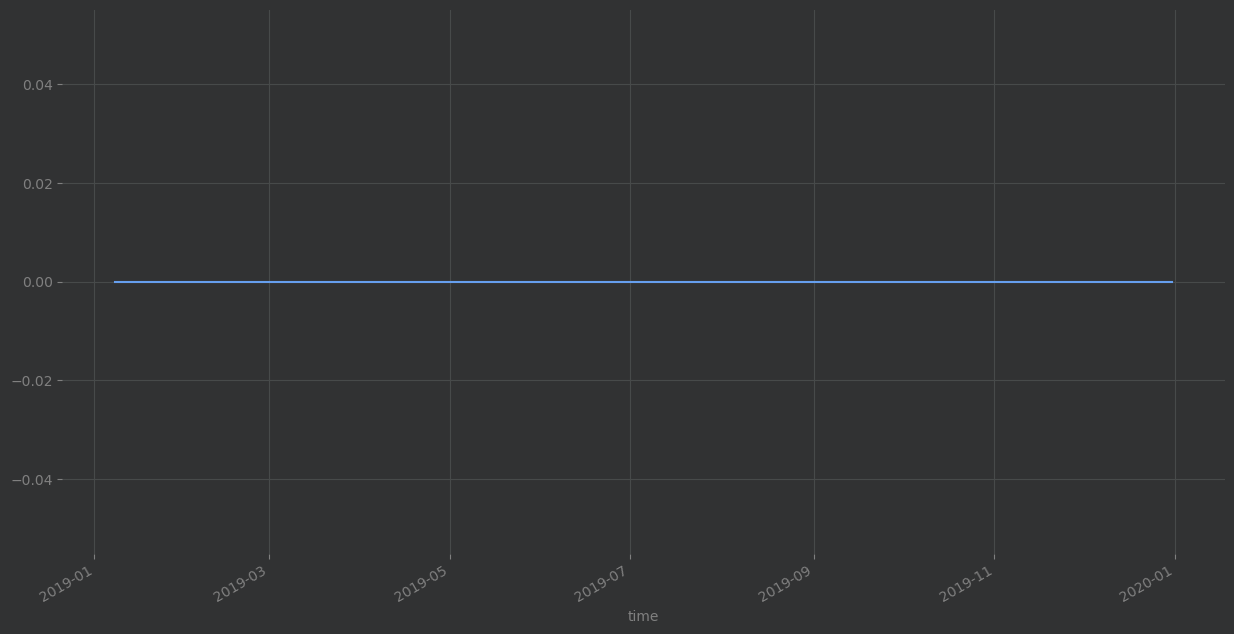

In [245]:

duration = 5

# Compute the percentage of variation of the asset
df["pct"] = df["close"].pct_change(1)

# Compute the return of the strategy
df["return"] = np.array([df["pct"].shift(i) for i in range(duration)]).sum(axis=0) * (df["signal"].shift(duration))


df["return"].cumsum().plot(figsize=(15,8))
     